In [1]:
import networkx as nx
G = nx.DiGraph()

In [138]:
with open("day_24_input_0.txt") as fname:
    starting_values, connections = fname.read().split("\n\n")

starting_values = starting_values.splitlines()
connections = connections.splitlines()
statedict = {}

In [141]:
connections[:10]

['ntg XOR fgs -> mjb',
 'y02 OR x01 -> tnw',
 'kwq OR kpj -> z05',
 'x00 OR x03 -> fst',
 'tgd XOR rvg -> z01',
 'vdt OR tnw -> bfw',
 'bfw AND frj -> z10',
 'ffh OR nrd -> bqk',
 'y00 AND y03 -> djm',
 'y03 OR y00 -> psh']

In [143]:
starting_values

['x00: 1',
 'x01: 0',
 'x02: 1',
 'x03: 1',
 'x04: 0',
 'y00: 1',
 'y01: 1',
 'y02: 1',
 'y03: 1',
 'y04: 1']

In [145]:
startnodes = []

for line in starting_values:
    gate, value = line.split(": ")
    statedict[gate] = int(value)
    startnodes.append(gate)

In [147]:
statedict

{'x00': 1,
 'x01': 0,
 'x02': 1,
 'x03': 1,
 'x04': 0,
 'y00': 1,
 'y01': 1,
 'y02': 1,
 'y03': 1,
 'y04': 1}

In [149]:
logicmap = {"XOR": "^", "AND": "&", "OR": "|"}

In [151]:
G.clear()

for line in connections:
    inputs, output_gate = line.split(" -> ")  # "tgd XOR rvg" "z01"
    input_one, logic, input_two = inputs.split()
    G.add_edge(input_one, output_gate, type=logicmap[logic])
    G.add_edge(input_two, output_gate, type=logicmap[logic])

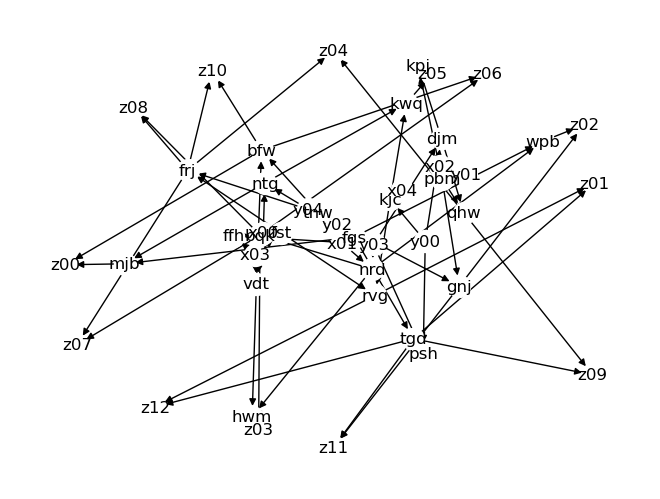

In [153]:
nx.draw_spring(G, with_labels=True, font_color="k", node_size=250, node_color="w")

In [155]:
# make a list of all end nodes
endnodes = []
for node in G.nodes():
    if G.out_degree(node) == 0:  # we've found and end point
        print(node)
        endnodes.append(node)

z05
z01
z10
z08
z11
z00
z02
z09
z06
z04
z07
z03
z12


In [157]:
print(len(statedict))

10


In [163]:
while not len(statedict) == len(G.nodes()):
    for node in G.nodes():
        if G.in_degree(node) == 2 and statedict.get(node) is None:  # avoid nodes that don't have 2 inputs (like the starting nodes), avoid nodes that already have a state set
            inputs = []
            for prenode, datadict in G.pred[node].items():  # get the names of the predecessor node and it's type
                inputs.append(prenode)

            # Just select nodes where we know what the two inputs are
            if statedict.get(inputs[0]) is not None and statedict.get(inputs[1]) is not None:  # have to explicitly test None, as 0 evaluates to False
                statedict[node] = eval(str(statedict.get(inputs[0])) + datadict["type"] + str(statedict.get(inputs[1])))
    
    print(len(statedict),"/",len(G.nodes()))

we can calculate ntg from x00 y04 using ^
we can calculate fgs from y04 y02 using |
we can calculate tnw from y02 x01 using |
we can calculate fst from x00 x03 using |
we can calculate vdt from x03 x00 using |
we can calculate bfw from vdt tnw using |
we can calculate frj from tnw fst using |
we can calculate ffh from x03 y03 using ^
we can calculate nrd from y03 x01 using |
we can calculate djm from y00 y03 using &
we can calculate psh from y03 y00 using |
we can calculate wpb from nrd fgs using ^
we can calculate kjc from x04 y00 using &
we can calculate pbm from y01 x02 using &
we can calculate hwm from nrd vdt using &
25 / 46
we can calculate mjb from ntg fgs using ^
we can calculate kwq from ntg kjc using |
we can calculate kpj from pbm djm using |
we can calculate tgd from psh fgs using ^
we can calculate rvg from kjc fst using &
we can calculate z10 from bfw frj using &
we can calculate bqk from ffh nrd using |
we can calculate z08 from bqk frj using |
we can calculate gnj from 

In [185]:
number_of_z_nodes = 0
for node in G.nodes():
    if node[0] == "z":  # first letter begins with z
        number_of_z_nodes += 1
number_of_z_nodes

13

In [229]:
binary = ""
for i in range(number_of_z_nodes):
    z_node_name = f'z{i:02}'
    binary += str(statedict[z_node_name])

# "binary" is the wrong endian, so we need to reverse it with [::-1] and convert from base 2 to 10
print(binary[::-1],"=",int(binary[::-1], 2))

0011111101000 = 2024


## Part 1

In [234]:
with open("day_24_input_1.txt") as fname:
    starting_values, connections = fname.read().split("\n\n")

starting_values = starting_values.splitlines()
connections = connections.splitlines()
statedict = {}

In [236]:
startnodes = []

for line in starting_values:
    gate, value = line.split(": ")
    statedict[gate] = int(value)
    startnodes.append(gate)

In [238]:
logicmap = {"XOR": "^", "AND": "&", "OR": "|"}

In [240]:
G.clear()

for line in connections:
    inputs, output_gate = line.split(" -> ")  # "tgd XOR rvg" "z01"
    input_one, logic, input_two = inputs.split()
    G.add_edge(input_one, output_gate, type=logicmap[logic])
    G.add_edge(input_two, output_gate, type=logicmap[logic])

In [242]:
while not len(statedict) == len(G.nodes()):
    for node in G.nodes():
        if G.in_degree(node) == 2 and statedict.get(node) is None:  # avoid nodes that don't have 2 inputs (like the starting nodes), avoid nodes that already have a state set
            inputs = []
            for prenode, datadict in G.pred[node].items():  # get the names of the predecessor node and it's type
                inputs.append(prenode)

            # Just select nodes where we know what the two inputs are
            if statedict.get(inputs[0]) is not None and statedict.get(inputs[1]) is not None:  # have to explicitly test None, as 0 evaluates to False
                statedict[node] = eval(str(statedict.get(inputs[0])) + datadict["type"] + str(statedict.get(inputs[1])))
    
    print(len(statedict),"/",len(G.nodes()))

181 / 312
184 / 312
188 / 312
190 / 312
193 / 312
197 / 312
199 / 312
200 / 312
203 / 312
205 / 312
209 / 312
215 / 312
218 / 312
221 / 312
223 / 312
226 / 312
229 / 312
233 / 312
238 / 312
239 / 312
242 / 312
244 / 312
248 / 312
250 / 312
256 / 312
257 / 312
260 / 312
265 / 312
266 / 312
269 / 312
270 / 312
275 / 312
278 / 312
280 / 312
281 / 312
292 / 312
295 / 312
296 / 312
299 / 312
301 / 312
302 / 312
304 / 312
312 / 312


In [244]:
number_of_z_nodes = 0
for node in G.nodes():
    if node[0] == "z":  # first letter begins with z
        number_of_z_nodes += 1
number_of_z_nodes

46

In [246]:
binary = ""
for i in range(number_of_z_nodes):
    z_node_name = f'z{i:02}'
    binary += str(statedict[z_node_name])

# "binary" is the wrong endian, so we need to reverse it with [::-1] and convert from base 2 to 10
print(binary[::-1],"=",int(binary[::-1], 2))

1000001100011001000110101100111101110001110000 = 36035961805936
